 a classification model that predicts weather conditions (e.g., rainy, sunny, snowy) based on a combination of weather attributes.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CLEANING AND PREPROCESSING

In [16]:
weather=pd.read_csv(r'/Users/pvans/Downloads/Weather dataset/Summary of Weather.csv',low_memory=False)
station=pd.read_csv(r'C:\Users\pvans\Downloads\Weather dataset\Weather Station Locations.csv')

In [17]:
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#replace station data column wban with sta to use same column to merge two cs
station = station.rename(columns={'WBAN':'STA'})

In [19]:
weathers=pd.merge(weather, station,on='STA',how='inner')##only includes rows where there is a match in the common column,Rows without a match are excluded from the result

In [20]:
weathers.drop(['WindGustSpd','DR','SPD','SND','FT','FB','FTI','ITH','PGT','SD3','RHX','RHN','RVG','WTE','PoorWeather','TSHDSBRSGF','MIN','MAX','MEA','LAT','LON','DA'],axis=1,inplace=True)

In [21]:
weathers= weathers.dropna(subset=['Snowfall','SNF','PRCP'])#drop from rows where nan 

In [22]:
df2 = weathers.fillna(0)#fill null with 0

In [23]:
weathers.loc[12] = 0#fill with zero for column

In [24]:
weathers.isnull().sum()

STA                 0
Date                0
Precip              0
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall            0
YR                  0
MO                  0
PRCP                0
SNF                 0
NAME                0
STATE/COUNTRY ID    0
ELEV                0
Latitude            0
Longitude           0
dtype: int64

In [25]:
#replace T with 0 to change dtype from O object to float
weathers.loc[weathers['Precip']=='T', 'Precip']=0
weathers.loc[weathers['PRCP'] == 'T', 'PRCP'] = 0


In [26]:
weathers['YR'] = pd.to_numeric(weathers['YR'], errors='coerce')
weathers['YR'].unique()
weathers.loc[weathers['YR'] == 0, 'YR'] = weathers['YR'].mode#whereever there is 0 replaced with mode 
print(weathers['YR'].unique())


[42 <bound method Series.mode of 0         42
    1         42
    2         42
    3         42
    4         42
              ..
    119035    45
    119036    45
    119037    45
    119038    45
    119039    45
    Name: YR, Length: 116174, dtype: int64>   43 44 45 41 40]


In [27]:
weathers_copy = weathers.copy()
column = weathers_copy['Precip'].dtype
print(column)

object


In [28]:
weathers_copy1 = weathers.copy()
column1 = weathers_copy1['PRCP'].dtype
print(column1)
#weathers['PRCP'] = weathers['PRCP'].astype(float)
#column=weathers['PRCP'].dtype
#column

object


</details>

# EDA

In [14]:
#numerical features from csv
numerical=[features for features in weathers.columns if weathers[features].dtypes!='O']
print(len(numerical))
weathers[numerical].head

8


<bound method NDFrame.head of           STA    MaxTemp    MinTemp   MeanTemp  MO  ELEV   Latitude  \
0       10001  25.555556  22.222222  23.888889   7    62   5.600000   
1       10001  28.888889  21.666667  25.555556   7    62   5.600000   
2       10001  26.111111  22.222222  24.444444   7    62   5.600000   
3       10001  26.666667  22.222222  24.444444   7    62   5.600000   
4       10001  26.666667  21.666667  24.444444   7    62   5.600000   
...       ...        ...        ...        ...  ..   ...        ...   
119035  82506  28.333333  18.333333  23.333333  12     2 -27.433333   
119036  82506  29.444444  18.333333  23.888889  12     2 -27.433333   
119037  82506  28.333333  18.333333  23.333333  12     2 -27.433333   
119038  82506  28.333333  18.333333  23.333333  12     2 -27.433333   
119039  82506  29.444444  17.222222  23.333333  12     2 -27.433333   

         Longitude  
0        -0.300000  
1        -0.300000  
2        -0.300000  
3        -0.300000  
4        -0.

In [15]:
#weathers['MO'] = weathers['MO'].astype('int64')
#weathers['MO'].dtype
weathers_copy1 = weathers.copy()
column1 = weathers_copy1['MO'].dtype
print(column1)

int64


Text(0.5, 1.0, 'Percip Outlier Boxplot')

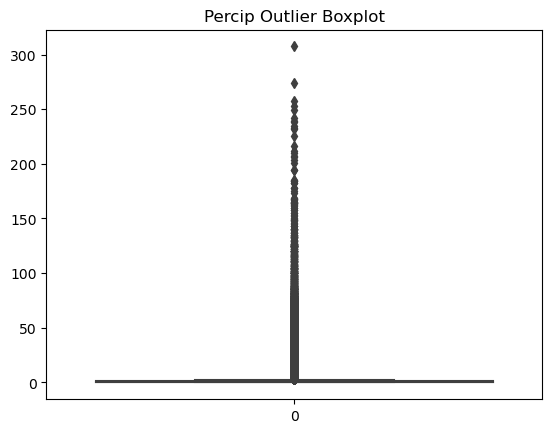

In [21]:
sns.boxplot(weathers['Precip'])
plt.title('Percip Outlier Boxplot')

In [37]:
weathers['Precip']=pd.to_numeric(weathers['Precip'], errors='coerce')

In [38]:
Q1 = weathers['Precip'].quantile(0.25)
Q3 = weathers['Precip'].quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - (1.5 * IQR)
maxi = Q3 + (1.5 * IQR)
remove_outlierspre = weathers[( weathers['Precip']>= mini) & ( weathers['Precip']<= maxi)]

mini,Q1,Q3,maxi,remove_outlierspre

(-1.524,
 0.0,
 1.016,
 2.54,
           STA        Date  Precip    MaxTemp    MinTemp   MeanTemp Snowfall  \
 0       10001    1942-7-1   1.016  25.555556  22.222222  23.888889        0   
 1       10001    1942-7-2   0.000  28.888889  21.666667  25.555556        0   
 2       10001    1942-7-3   2.540  26.111111  22.222222  24.444444        0   
 3       10001    1942-7-4   2.540  26.666667  22.222222  24.444444        0   
 4       10001    1942-7-5   0.000  26.666667  21.666667  24.444444        0   
 ...       ...         ...     ...        ...        ...        ...      ...   
 119034  82506  1945-12-26   0.000  29.444444  18.888889  24.444444        0   
 119035  82506  1945-12-27   0.000  28.333333  18.333333  23.333333        0   
 119037  82506  1945-12-29   0.000  28.333333  18.333333  23.333333        0   
 119038  82506  1945-12-30   0.000  28.333333  18.333333  23.333333        0   
 119039  82506  1945-12-31   0.000  29.444444  17.222222  23.333333        0   
 
        

Text(0.5, 1.0, 'Percip Outliers Removed')

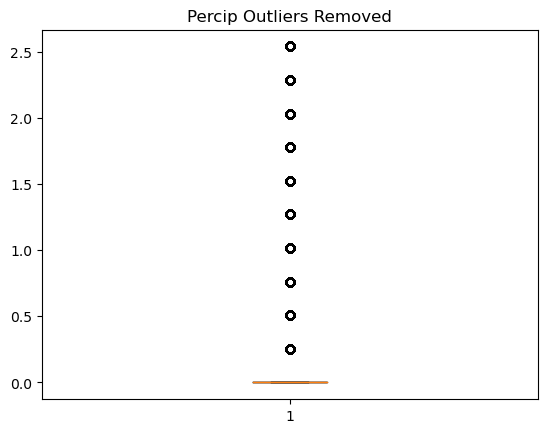

In [41]:
plt.boxplot(remove_outlierspre['Precip'])
plt.title('Percip Outliers Removed')

{'whiskers': [<matplotlib.lines.Line2D at 0x231772e5fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x231772e7290>,
 'boxes': [<matplotlib.lines.Line2D at 0x231772e5750>],
 'medians': [<matplotlib.lines.Line2D at 0x231772f44d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x231772f4d50>],
 'means': []}

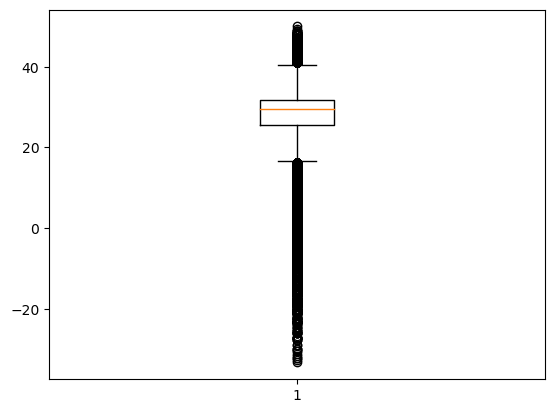

In [42]:
plt.boxplot(weathers['MaxTemp'],data=weathers)

In [43]:
Q1 = weathers['MaxTemp'].quantile(0.25)
Q3 = weathers['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1
mini = Q1 - (1.5 * IQR)
maxi = Q3 + (1.5 * IQR)
remove_outlierstemp = weathers[( weathers['MaxTemp']>= mini) & ( weathers['MaxTemp']<= maxi)]

mini,Q1,Q3,maxi,remove_outlierstemp

(16.388888894999994,
 25.55555556,
 31.66666667,
 40.833333335000006,
           STA        Date  Precip    MaxTemp    MinTemp   MeanTemp Snowfall  \
 0       10001    1942-7-1   1.016  25.555556  22.222222  23.888889        0   
 1       10001    1942-7-2   0.000  28.888889  21.666667  25.555556        0   
 2       10001    1942-7-3   2.540  26.111111  22.222222  24.444444        0   
 3       10001    1942-7-4   2.540  26.666667  22.222222  24.444444        0   
 4       10001    1942-7-5   0.000  26.666667  21.666667  24.444444        0   
 ...       ...         ...     ...        ...        ...        ...      ...   
 119035  82506  1945-12-27   0.000  28.333333  18.333333  23.333333        0   
 119036  82506  1945-12-28   9.906  29.444444  18.333333  23.888889        0   
 119037  82506  1945-12-29   0.000  28.333333  18.333333  23.333333        0   
 119038  82506  1945-12-30   0.000  28.333333  18.333333  23.333333        0   
 119039  82506  1945-12-31   0.000  29.444444  17.

{'whiskers': [<matplotlib.lines.Line2D at 0x23177dc7150>,
 'caps': [<matplotlib.lines.Line2D at 0x23177dd8710>,
 'boxes': [<matplotlib.lines.Line2D at 0x23177dc6f10>],
 'medians': [<matplotlib.lines.Line2D at 0x23177dd9710>],
 'fliers': [<matplotlib.lines.Line2D at 0x2317732af50>],
 'means': []}

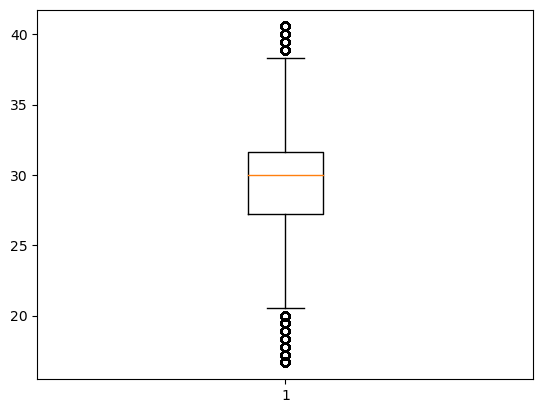

In [45]:
plt.boxplot(remove_outlierstemp['MaxTemp'])

(array([3.6000e+01, 1.3500e+02, 8.1000e+02, 7.3400e+02, 1.4870e+03,
        5.4430e+03, 1.1440e+04, 3.1383e+04, 6.2548e+04, 2.1580e+03]),
 array([-35.55555556, -28.        , -20.44444445, -12.88888889,
         -5.33333334,   2.22222222,   9.77777778,  17.33333333,
         24.88888889,  32.44444444,  40.        ]),
 <BarContainer object of 10 artists>)

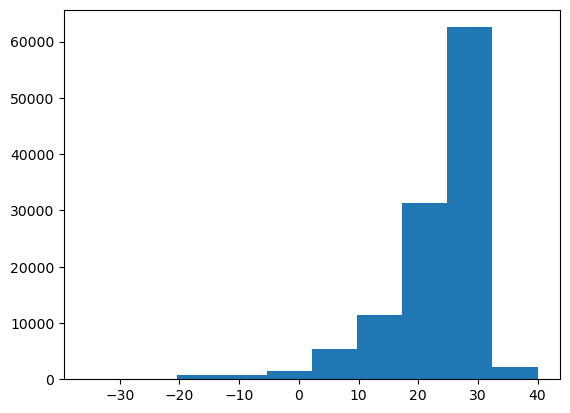

In [46]:
#x = weathers['YR'].value_counts()
#plt.pie(x.values,labels=x.index)
#plt.show()
plt.hist(  'MeanTemp' ,data = weathers )

Text(0, 0.5, 'Max and Min Temperature')

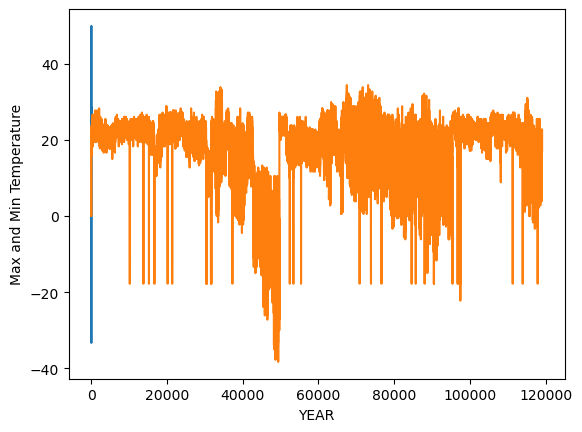

In [47]:
plt.plot(  weathers.YR, weathers.MaxTemp, weathers.MinTemp,)
plt.xlabel("YEAR")
plt.ylabel("Max and Min Temperature")

# Insgiht 1

identify patterns, correlations, and trends in dataset

<Axes: >

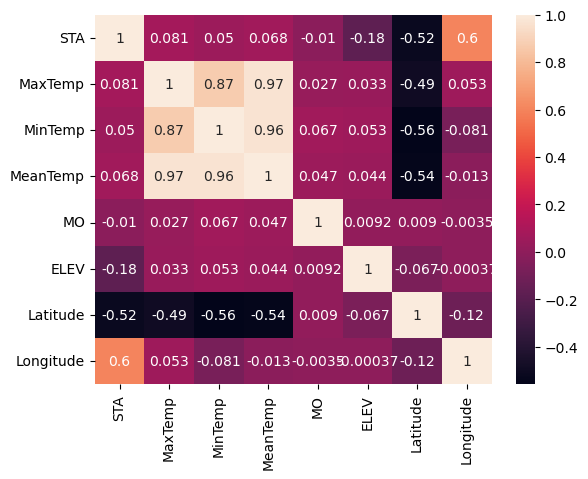

In [16]:
sns.heatmap(weathers.corr(numeric_only=True) , annot = True )

# Insight 2

relation between year and temperatures

In [34]:
weathers['YR']=pd.to_numeric(weathers['YR'], errors='coerce')

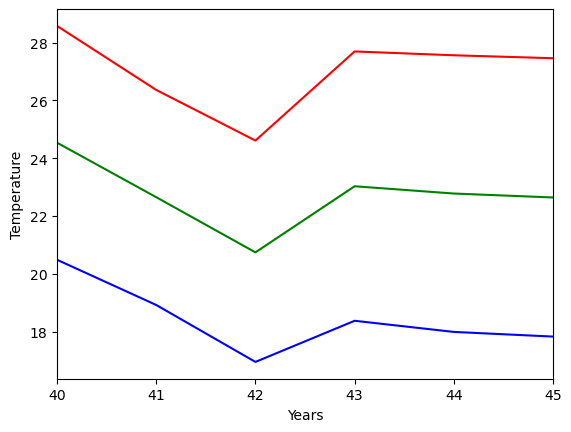

In [35]:

weathers.groupby('YR')['MaxTemp'].mean().plot(color='red',label='MaxTemp')
weathers.groupby('YR')['MeanTemp'].mean().plot(color='green',label='MeanTemp')
weathers.groupby('YR')['MinTemp'].mean().plot(color='blue',label='MinTemp')
plt.xlim(40, 45)
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()


# Insight 2.2


Text(0, 0.5, 'Temperature')

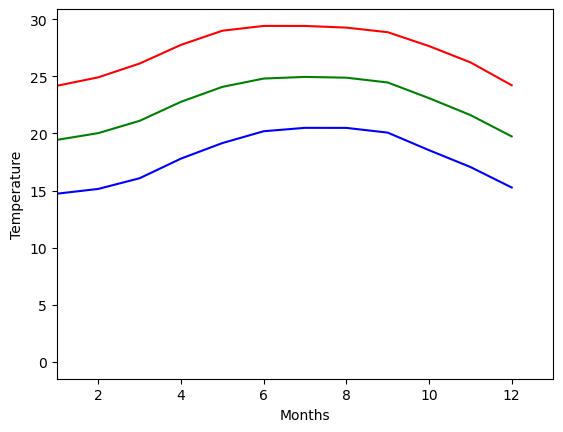

In [20]:
#relation between year and temperatures
weathers.groupby('MO')['MaxTemp'].mean().plot(color='red',label='MaxTemp')
weathers.groupby('MO')['MeanTemp'].mean().plot(color='green',label='MeanTemp')
weathers.groupby('MO')['MinTemp'].mean().plot(color='blue',label='MinTemp')
plt.xlim(1, 13)
plt.xlabel('Months')
plt.ylabel('Temperature')

# Insight 3

categorical vales we used group by

Text(0.5, 1.0, 'Monthly Mean Minimum Temperature.')

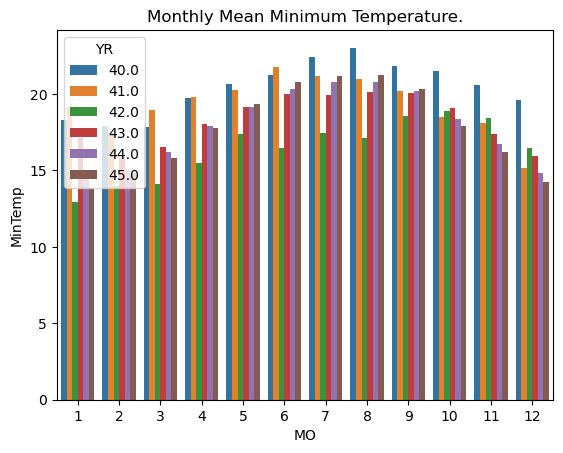

In [48]:

mintemp = weathers.groupby(['YR', 'MO'])['MinTemp'].mean().reset_index()
maxtemp = weathers.groupby(['YR', 'MO'])['MaxTemp'].mean().reset_index()

sns.barplot(data=mintemp,x="MO", y="MinTemp", hue="YR")
plt.title('Monthly Mean Minimum Temperature.')



# Insight 3.2

Text(0.5, 1.0, 'Monthly Mean Maximum Temperature.')

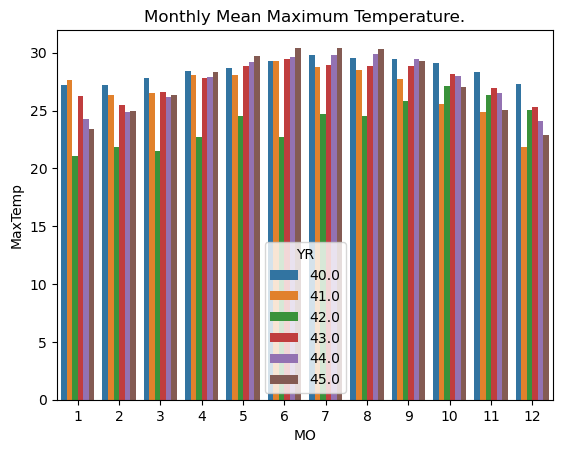

In [49]:
sns.barplot(data=maxtemp,x="MO", y="MaxTemp", hue="YR")
plt.title('Monthly Mean Maximum Temperature.')

# Insight 4

Getting the hottest year,month,country during the ww2

In [50]:
waryears= weathers[(weathers['YR'] >= 39) & (weathers['YR'] <= 45)]#39,45 range of years between which ww2 held

hottest = waryears['MaxTemp'].max()#max temp from the year

hottest_temp = waryears[waryears['MaxTemp'] == hottest]#max temp from all the years

print("Hottest Temp:",hottest)
print("Year: 19",hottest_temp['YR'].iloc[0])#Year: 19 87518    44 Name: YR, dtype: int64  if no iloc
print("Month:",hottest_temp['MO'].iloc[0])
print("Country code:",hottest_temp['STATE/COUNTRY ID'].iloc[0])

Hottest Temp: 50.0
Year: 19 44.0
Month: 7
Country code: IR


# Insight 4.2

In [51]:
#Getting the coldest year,month,country during the ww2
waryears= weathers[(weathers['YR'] >= 39) & (weathers['YR'] <= 45)]#39,45 range of years between which ww2 held

coldest = waryears['MinTemp'].min()#min temp from the year

coldest_temp = waryears[waryears['MinTemp'] == coldest]#min temp from all the years

print("Coldest Temp:",coldest)
print("Year: 19",coldest_temp['YR'].iloc[0])#Year: 19 87518    44 Name: YR, dtype: int64  if no iloc
print("Month:",coldest_temp['MO'].iloc[0])
print("Country code:",coldest_temp['STATE/COUNTRY ID'].iloc[0])

Coldest Temp: -38.33333333
Year: 19 45.0
Month: 2
Country code: GL


In [52]:
weathers['PRCP'] = pd.to_numeric(weathers['PRCP'], errors='coerce')
print(weathers['PRCP'].dtype)


float64


# Insight 5

how rain would have impacted military movements

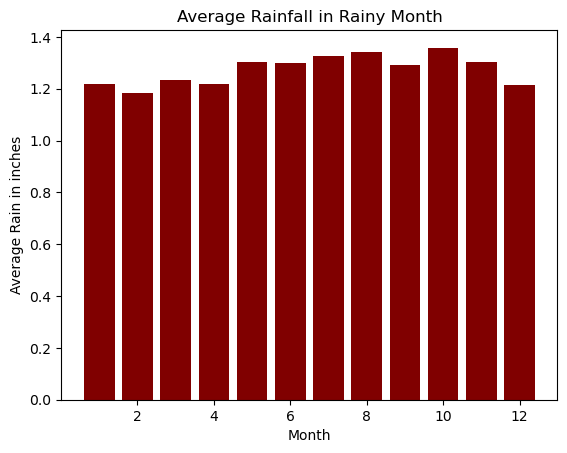

In [53]:
waryears= weathers[(weathers['YR']>= 39) & (weathers['YR']<= 45)]#39,45 range of years between which ww2 held

rainy = waryears[waryears['PRCP'] > 0.5]#data where precipitation is more than 0.5 will consider as rained in that year

rainmonthly = rainy.groupby('MO')['PRCP'].mean()#calculate mean of rain for each month of the year 

plt.bar(rainmonthly.index,rainmonthly,color ='maroon')
plt.xlabel('Month')
plt.ylabel('Average Rain in inches')
plt.title('Average Rainfall in Rainy Month')

plt.show()

# Insight 6

using particular station to plot its elevation and precipitation of that location  
understanding relationships between weather variables at a specific location over time.

CAN CHECK WHAT ELEV HAS IMPACT ON PRECIPITATION RATE

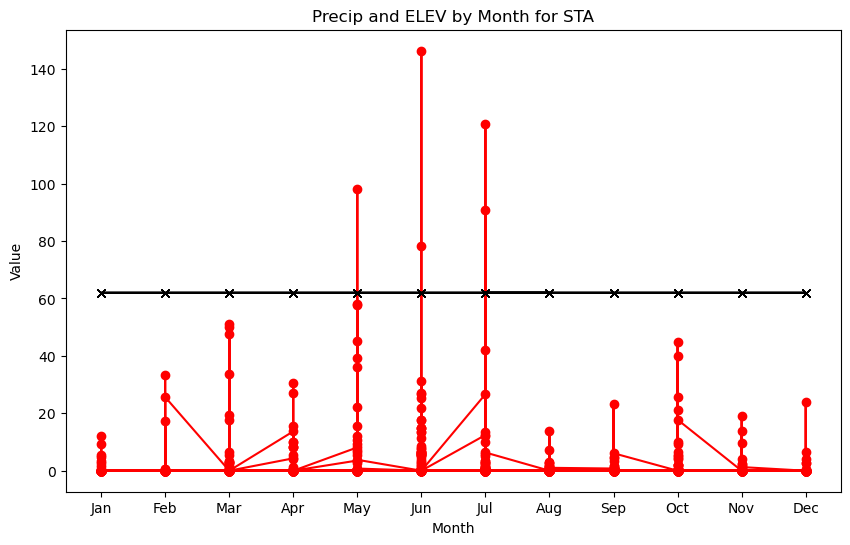

In [56]:

selected_columns = ['STA', 'Precip', 'ELEV']

filtered_data = weathers[weathers['STA'] == 10001]#provide station id

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
tick_locations = range(1, 13) 

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['MO'], filtered_data['Precip'], label='Precip', marker='o',color='red')
plt.plot(filtered_data['MO'], filtered_data['ELEV'], label='ELEV', marker='x',color='black')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Precip and ELEV by Month for STA')
plt.xticks(tick_locations, months)
plt.show()

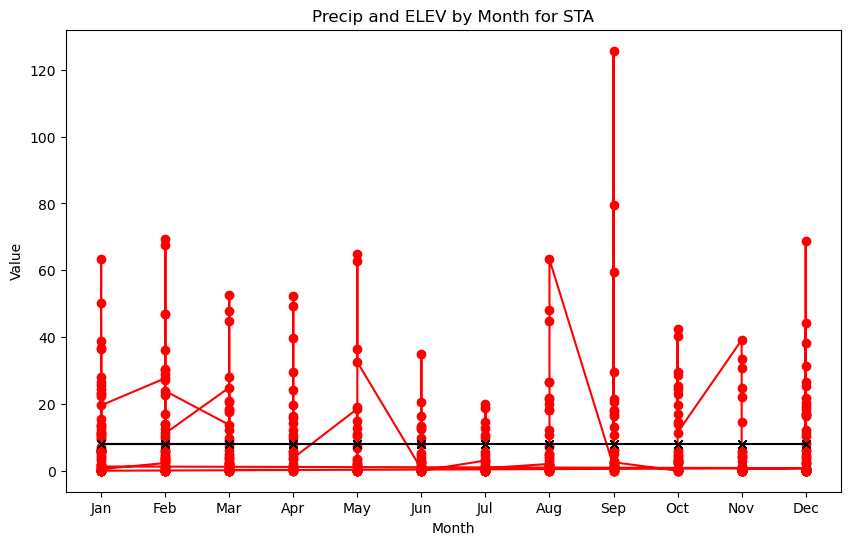

In [57]:
#using particular station to plot its elevation and precipitation of that location  
selected_columns = ['STA', 'Precip', 'ELEV']

filtered_data = weathers[weathers['STA'] == 80504]

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
tick_locations = range(1, 13) 

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['MO'], filtered_data['Precip'], label='Precip', marker='o',color='red')
plt.plot(filtered_data['MO'], filtered_data['ELEV'], label='ELEV', marker='x',color='black')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Precip and ELEV by Month for STA')
plt.xticks(tick_locations, months)
plt.show()

# Insight 7

could be helpful to for militry to analyse at what location what were the condition and what all precautionary supply need to be caried

In [58]:
weathers['YR']=pd.to_numeric(weathers['YR'], errors='coerce')

Rainfall in the state where the station is located: 109838    0.00
109839    0.00
109840    0.00
109841    0.00
109842    0.00
          ... 
110290    0.15
110291    0.02
110292    0.20
110293    0.07
110294    0.29
Name: PRCP, Length: 457, dtype: float64
Snowfall in the state where the station is located: 109838    0
109839    0
109840    0
109841    0
109842    0
         ..
110290    0
110291    0
110292    0
110293    0
110294    0
Name: Snowfall, Length: 457, dtype: object


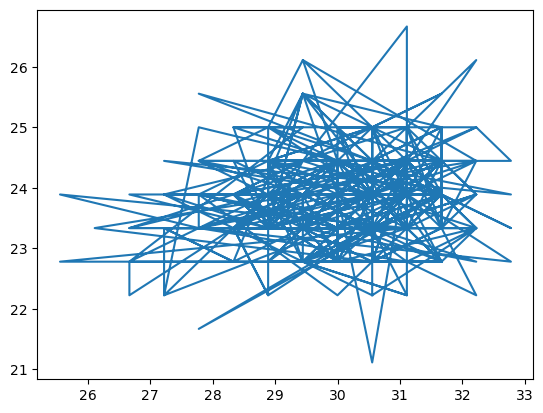

In [71]:

waryears= weathers[(weathers['YR'] >= 39) & (weathers['YR'] <= 45)]

position= waryears[(waryears['Longitude'] == 157.0166667 ) & (waryears['Latitude'] == -8.333333333 )]#provide lati & longi for analysis

plt.plot(position['MaxTemp'],position['MinTemp'])

print("Rainfall in the state where the station is located:",position['PRCP'])
print("Snowfall in the state where the station is located:",position['Snowfall'])


# Insight 8

1. identify regions where more comprehensive weather data collection might be necessary due to fewer data points.
2. disproportionately large number of data points compared to others, it might raise questions about data quality, potential biases, or data collection methodology

PM    10069
IN     9361
HI     9028
BZ     6244
IY     5444
AU     5080
GL     3947
AL     3791
MC     3144
LI     2862
Name: STATE/COUNTRY ID, dtype: int64


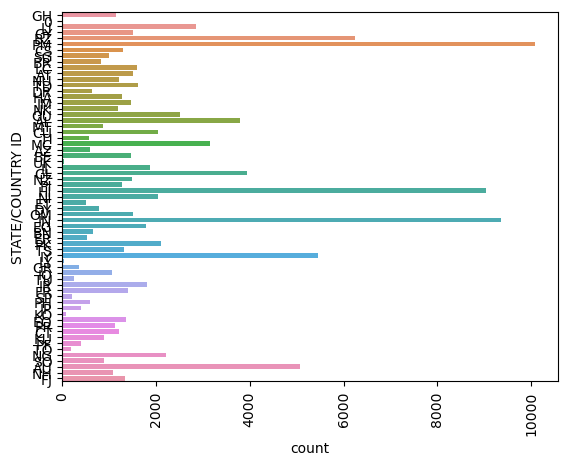

In [69]:
print(weathers['STATE/COUNTRY ID'].value_counts()[:10])

sns.countplot(y = 'STATE/COUNTRY ID', data=weathers)
plt.xticks(rotation=90)
plt.show()

# Insight 9

Can see any trends in the haet wave or cold wave could help in climate change and environment effect due to this

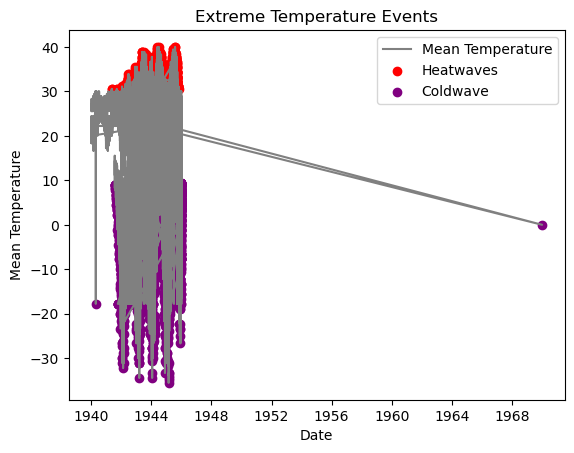

In [66]:
selected_columns = ['Date', 'MeanTemp']

temperature_data = weathers[selected_columns].copy()

#gives error else
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

#threshold
heatwave_threshold = 30  
cold_wave_threshold = 10  

#calculate heatwave and coldwave
temperature_data['Heatwave'] = temperature_data['MeanTemp'] > heatwave_threshold
temperature_data['Coldwave'] = temperature_data['MeanTemp'] < cold_wave_threshold



plt.plot(temperature_data['Date'], temperature_data['MeanTemp'], label='Mean Temperature', color='grey')
plt.scatter(temperature_data[temperature_data['Heatwave']]['Date'], temperature_data[temperature_data['Heatwave']]['MeanTemp'], color='red', label='Heatwaves')
plt.scatter(temperature_data[temperature_data['Coldwave']]['Date'], temperature_data[temperature_data['Coldwave']]['MeanTemp'], color='purple', label='Coldwave')
plt.title('Extreme Temperature Events')

plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()

In [73]:
weathers.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'PRCP', 'SNF', 'NAME', 'STATE/COUNTRY ID', 'ELEV',
       'Latitude', 'Longitude'],
      dtype='object')

# Insight 10

insights into geographical patterns that might affect weather conditions

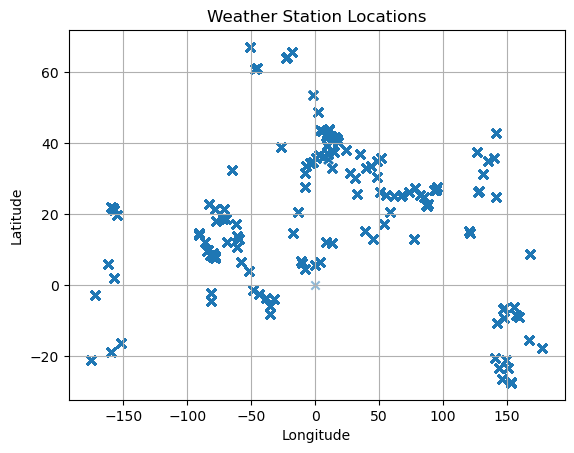

In [65]:

selected_columns = ['Latitude', 'Longitude']

location_data = weathers[selected_columns]


plt.scatter(location_data['Longitude'], location_data['Latitude'], marker='x', alpha=0.5)
plt.title('Weather Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

helps to identify region with more numbers of station

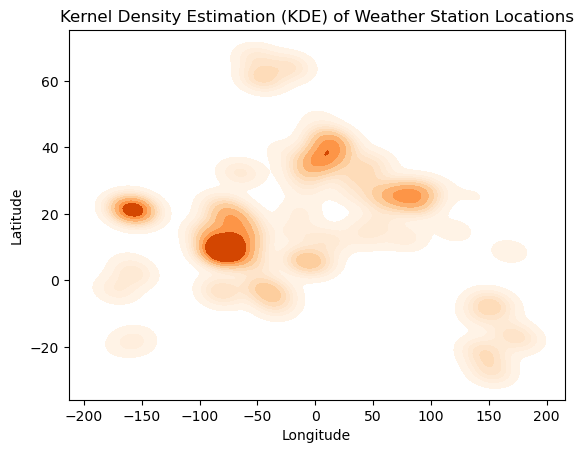

In [64]:

selected_columns = ['Latitude', 'Longitude']

location_data = weathers[selected_columns]


sns.kdeplot(data=location_data, x='Longitude', y='Latitude', cmap='Oranges', fill=True)
plt.title('Kernel Density Estimation (KDE) of Weather Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Insight 11

Snow falls at sea level poleward of latitude 35° N and 35° S

this insight shows how the snf is affected by the latitude and longitude

C:\Users\pvans\AppData\Local\Temp\ipykernel_14568\3089301769.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(longitude, latitude, c='g', cmap='Blues',  alpha=0.7)#c=snowfall but snf has more 0 fields


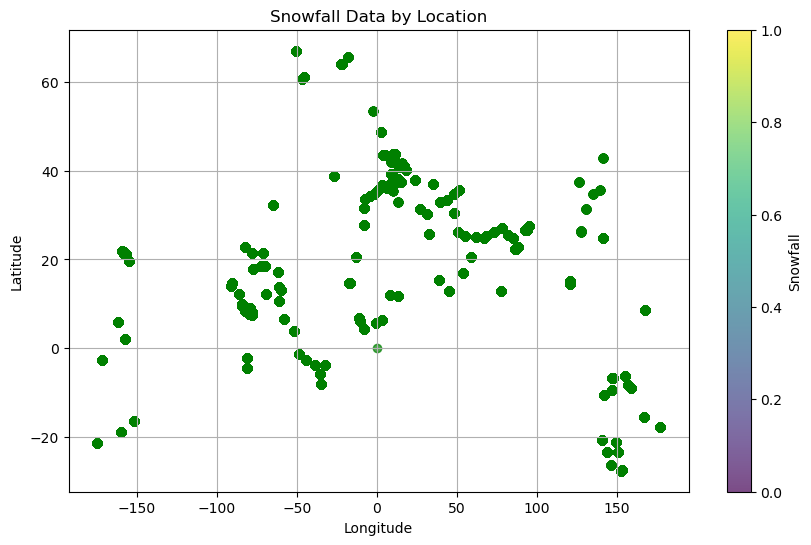

In [23]:
#snf coming as 0 check values are mostly 0 that's why not proper visual in colorbar
latitude = weathers['Latitude']
longitude = weathers['Longitude']
snowfall = weathers['SNF']


plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='g', cmap='Blues',  alpha=0.7)#c=snowfall but snf has more 0 fields
plt.colorbar(label='Snowfall')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Snowfall Data by Location')
plt.grid(True)
plt.show()

# Insight 12


Take input of name and get all information for the station 

can conclude refering the output

In [101]:
waryears= weathers[(weathers['NAME'] == 'ACCRA')] #39,45 range of years between which ww2 held


print("Mean Temp:",waryears['MeanTemp'].iloc[0])
print("LONGITUDE:",waryears['Longitude'].iloc[0])#Year: 19 87518    44 Name: YR, dtype: int64  if no iloc
print("LATITUDE:",waryears['Latitude'].iloc[0])
print("Snowfall:",waryears['Snowfall'].iloc[0])
print("Elevation:",waryears['ELEV'].iloc[0])
print("Country Code:",waryears['STATE/COUNTRY ID'].iloc[0])

Mean Temp: 23.88888889
LONGITUDE: -0.3
LATITUDE: 5.6
Snowfall: 0
Elevation: 62
Country Code: GH


In [97]:
weathers.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'PRCP', 'SNF', 'NAME', 'STATE/COUNTRY ID', 'ELEV',
       'Latitude', 'Longitude'],
      dtype='object')

# Encoding

In [70]:
##not useful as many unique values in categorical data 
categorical_columns = ['STA', 'NAME', 'STATE/COUNTRY ID']
encoded_columns = pd.get_dummies(weathers[categorical_columns], columns=categorical_columns)
df_encoded = pd.concat([weathers, encoded_columns], axis=1)
print(df_encoded)

          STA Precip    MaxTemp    MinTemp   MeanTemp Snowfall  YR  MO  PRCP  \
0       10001  1.016  25.555556  22.222222  23.888889        0  42   7  0.04   
1       10001      0  28.888889  21.666667  25.555556        0  42   7     0   
2       10001   2.54  26.111111  22.222222  24.444444        0  42   7   0.1   
3       10001   2.54  26.666667  22.222222  24.444444        0  42   7   0.1   
4       10001      0  26.666667  21.666667  24.444444        0  42   7     0   
...       ...    ...        ...        ...        ...      ...  ..  ..   ...   
119035  82506      0  28.333333  18.333333  23.333333        0  45  12     0   
119036  82506  9.906  29.444444  18.333333  23.888889        0  45  12  0.39   
119037  82506      0  28.333333  18.333333  23.333333        0  45  12     0   
119038  82506      0  28.333333  18.333333  23.333333        0  45  12     0   
119039  82506      0  29.444444  17.222222  23.333333        0  45  12     0   

       SNF  ... STATE/COUNTRY ID_PR STA

# Model Training

# LINEAR

0.935
Accuracy: 93.5%


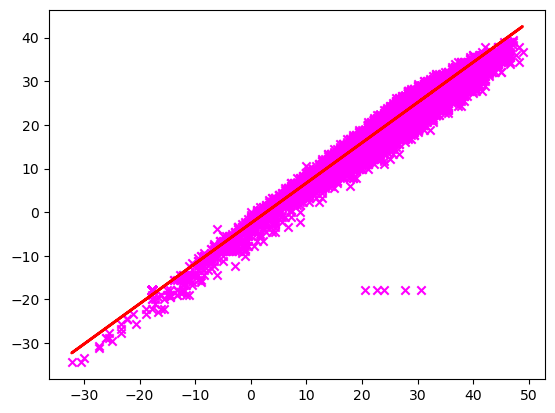

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Y = np.array(weathers['MeanTemp']).reshape(-1, 1)
X = np.array(weathers['MaxTemp']).reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

lr = LinearRegression()  
lr.fit(X_train, Y_train)

prediction = lr.predict(X_test)                                     
accuracy = lr.score(X_test, Y_test)

df = pd.DataFrame({'Actual':Y_test.flatten(), 'Predicted':prediction.flatten()})

from sklearn import metrics
from sklearn.metrics import r2_score

print("{:.3}".format(r2_score(Y_test, prediction)))
print("Accuracy: " + "{:.1%}".format(accuracy))

plt.scatter(X_test,Y_test,color='magenta',marker='x')
plt.plot(X_test,prediction,color='red',linewidth=2)